<p align="center"><img src="https://raw.githubusercontent.com/tquangsdh20/data-mining-g9/main/.github/logo.svg"></p>
<p align="center">
<img src="https://img.shields.io/badge/Group9-Tran%20Quang%20%7C%20Le%20Minh%20Thinh%20%7C%20Tran%20Hoang%20Vinh%20%7C%20Nguyen%20Hoang%20Phuc%20%7C%20Nguyen%20Dinh%20Hoang%20Quy-blue?style=plastic"> <a href="https://hcmuteduvn-my.sharepoint.com/:p:/g/personal/tquang_sdh20_hcmut_edu_vn/ESF5Nw7KJjhEg2z5CShtaBgBfl2taEaF3A-CZRBPIniB0w?e=6ItczB"><img src="https://img.shields.io/badge/PowerPoint-RBAC-red?style=plastic&logo=microsoftpowerpoint&logoColor=orange"></a> <img src="https://img.shields.io/badge/Lecturer-Tran%20Minh%20Quang-orange?style=plastic"> <img src="https://img.shields.io/badge/version-4.0.5-blue?style=plastic&logo=R">
</p>

In [99]:
#Import library
options(warn=0)
require(dplyr)
require(ggplot2)
require(caTools)
require(ROSE)
require(smotefamily)
require(rpart)
require(rpart.plot)
require(caret)

## Tổng quan về dữ liệu

<p align="justify">Tập dữ liệu <b>Fraud Credit Card</b> biểu diễn <i>284 807</i> giao dịch trong 2 ngày ở Châu Âu vào tháng 9 năm 2013. Trong đó, theo điều tra gồm có <i>492</i> gian lận chiếm <i>0.172%</i> tổng các giao dịch. Gồm có 31 biến trong tập dữ liệu:</p>

- _**Time**_ : Thời gian giao dịch diễn ra tính từ giao dịch đầu tiên (seconds)
- <div>\(V_i\) (Với i = 1,2..., 28): Là các thông số sau khi phân tích PCA và ẩn đi thông tin</div>
- _**Amount**_ : Giá trị giao dịch
- _**Class**_ : Gồm có hai giá trị (*0 - Giao dịch bình thường / 1 - Giao dịch gian lận*)

Tập dữ liệu download từ <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud/version/3"><b>Kaggle</b></a>.</p>

In [3]:
credit_dat <- read.csv('creditcard.csv')
head(credit_dat)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [5]:
credit_dat$Class = as.factor(credit_dat$Class)
credit_card = credit_dat

0     1 
56856   105

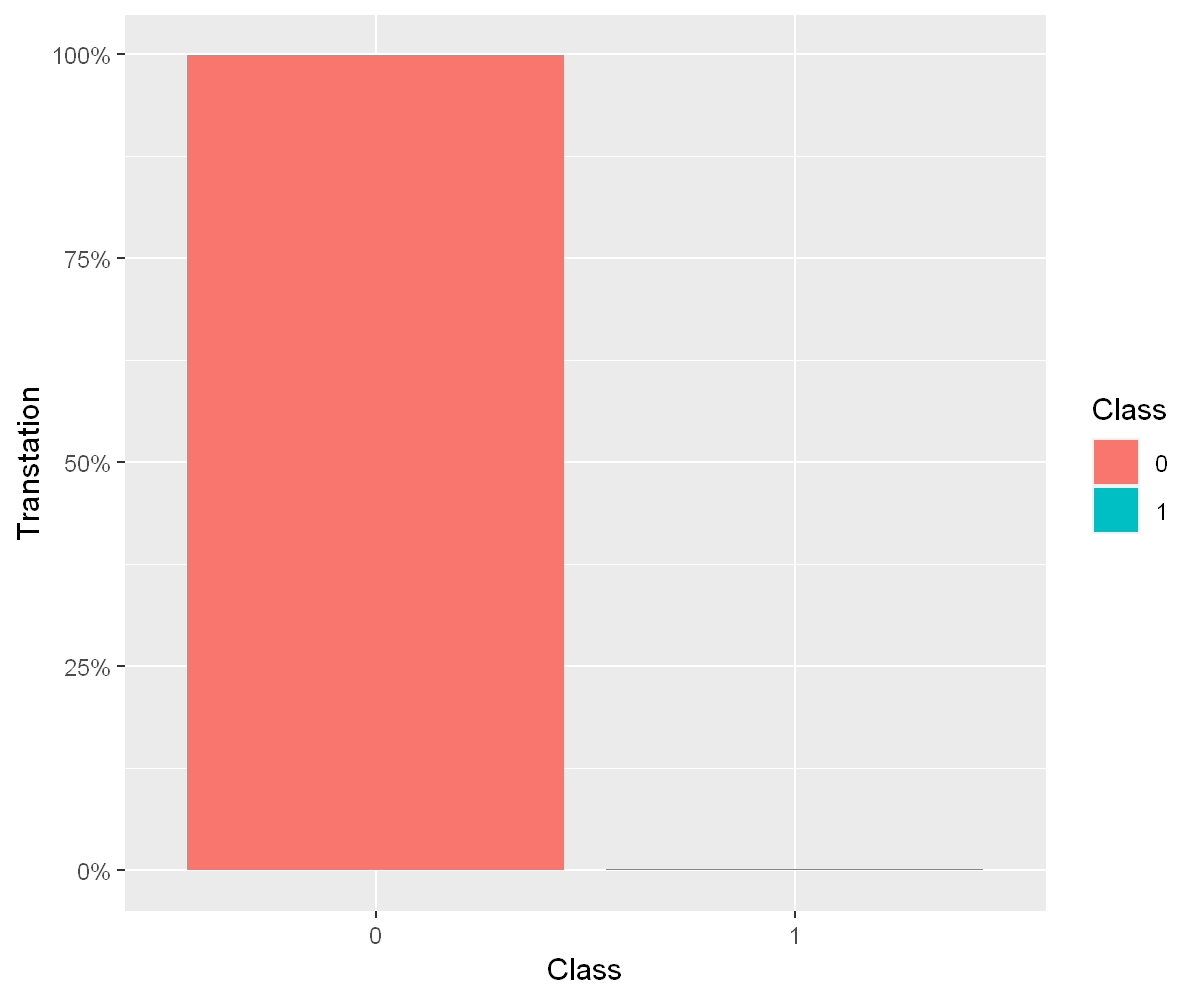

In [100]:
require(ggplot2)
p = ggplot(credit_dat,aes(Class))
summary(credit_dat$Class)
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 200)
p + geom_bar(aes(y = (..count..)/sum(..count..),fill = Class)) +
scale_y_continuous(labels=scales::percent) +
ylab("Transtation") 
# scale_color_manual(values=c('dodgerblue2','red'))

## Triết suất random dữ liệu trong dataset

0     1 
56856   105

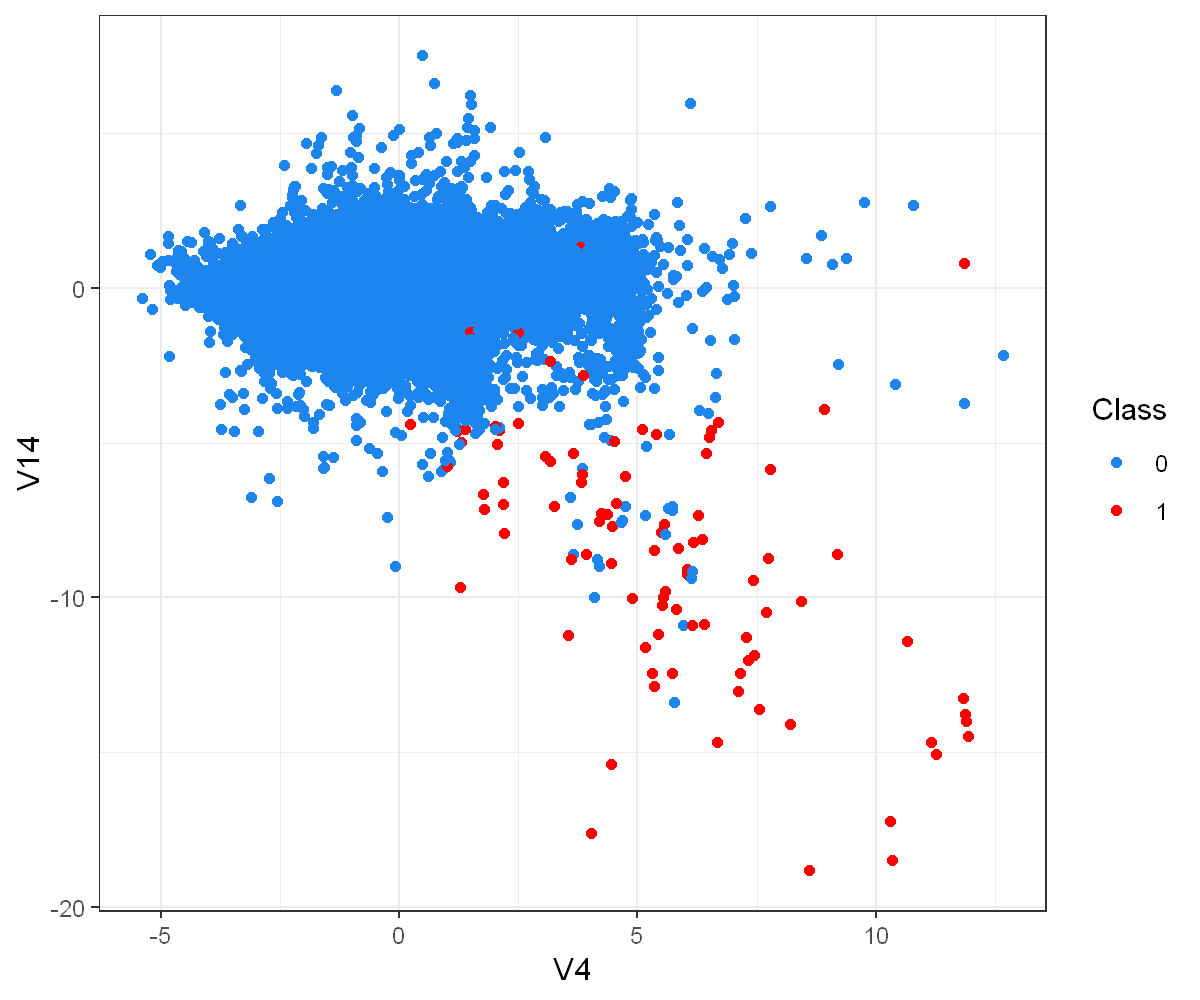

In [101]:
# require(dplyr)
set.seed(1)
credit_dat = credit_card %>% sample_frac(0.2)
ggplot(credit_dat, aes(x=V4,y=V14,col=Class)) +
    geom_point() +
    theme_bw() +
    scale_color_manual(values=c('dodgerblue2','red'))
summary(credit_dat$Class)

### Phân tách dữ liệu

In [102]:
require(caTools)
set.seed(1)
dat_smpl = sample.split(credit_dat$Class,SplitRat=0.8)
train_dat = subset(credit_dat,dat_smpl == T)
test_dat = subset(credit_dat,dat_smpl == F)
train_dim = dim(train_dat)
test_dim = dim(test_dat)
print(paste(c("Train Dataset: Records = ","Variables = "),train_dim))
print(paste(c("Test Dataset : Records = ","Variables = "),test_dim))

[1] "Train Dataset: Records =  45569" "Variables =  31"                
[1] "Test Dataset : Records =  11392" "Variables =  31"                


In [103]:
table(train_dat$Class)


    0     1 
45485    84 

## Classification with the Unbalanced Dataset

### Lấy mẫu ROS - Random Over Sampling

In [104]:
require(ROSE)
n_legal = 45485
frac_legal = 0.5
n_total = n_legal/frac_legal
ovrsmpl_res = ovun.sample(
                        Class ~ .
                        , data = train_dat
                        , method = "over"
                        , N = n_total
                        , seed = 100
)


    0     1 
45485 45485 

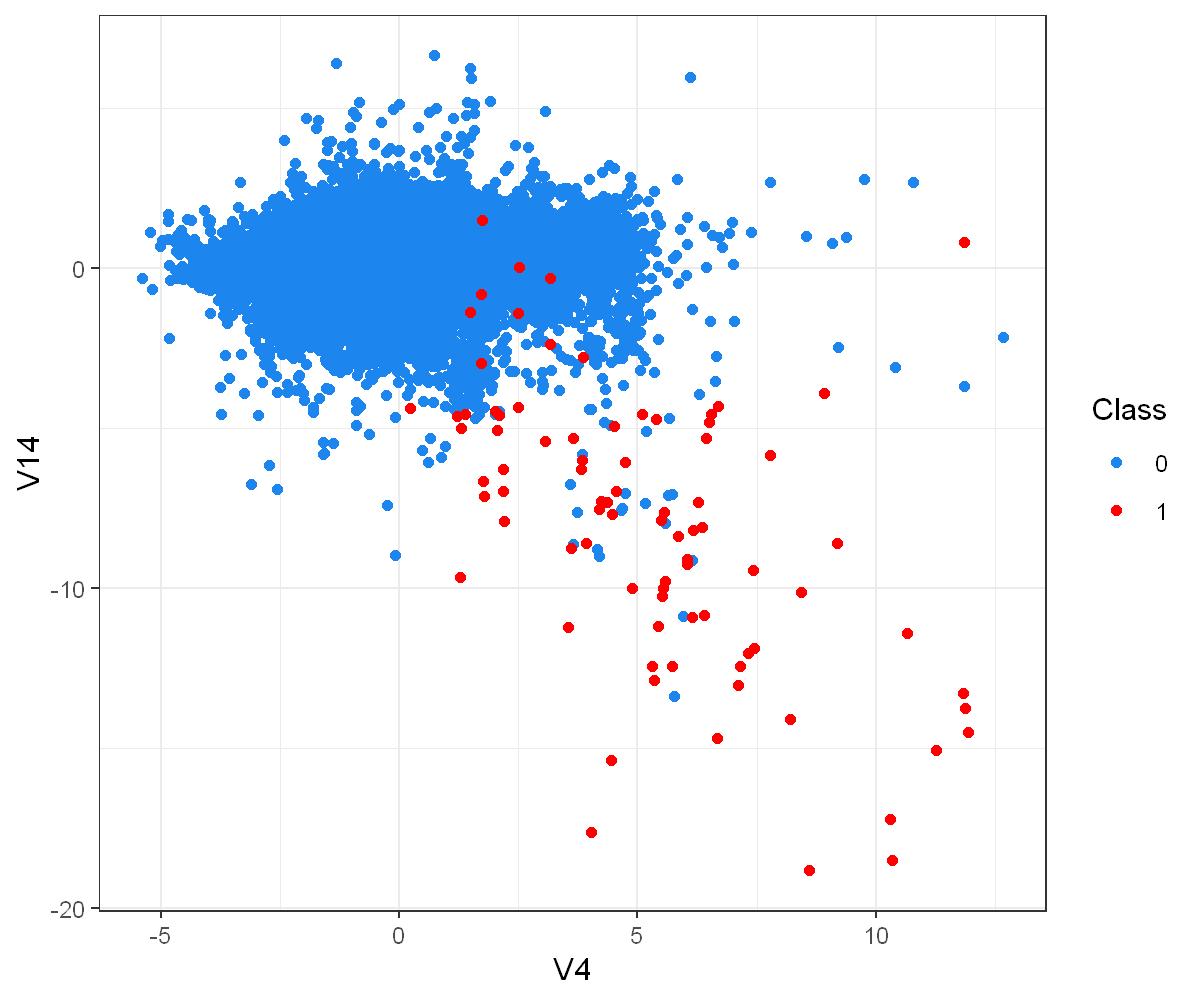

In [105]:
ovrsmpl = ovrsmpl_res$data
table(ovrsmpl$Class)
ggplot(ovrsmpl, aes(x=V4,y=V14,col=Class)) +
    geom_point() +
    theme_bw() +
    scale_color_manual(values=c('dodgerblue2','red'))

### Lấy mẫu RUS - Random Under Sampling


 0  1 
84 84 

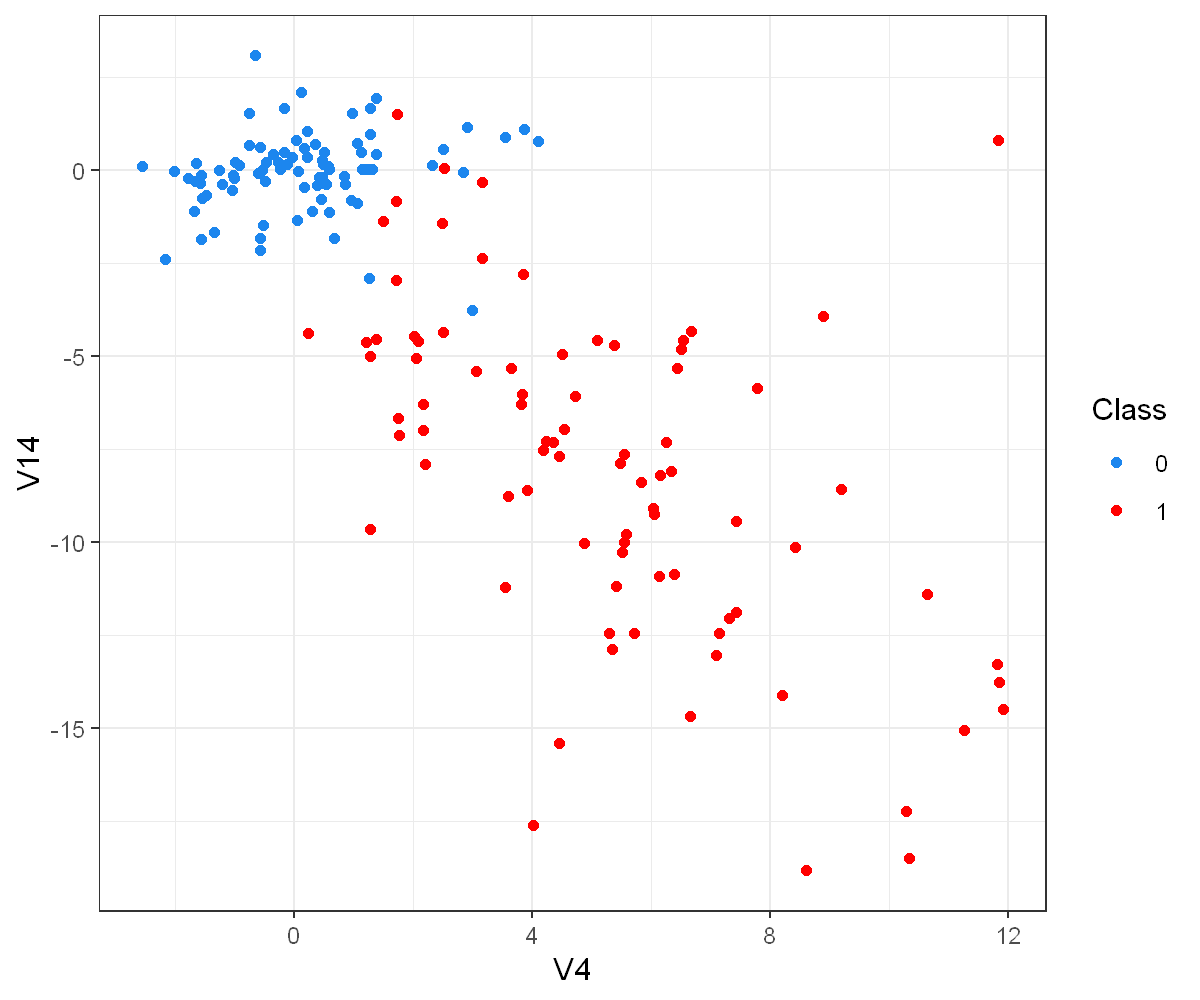

In [106]:
n_fraud = 84
frac_fraud = 0.5
n_total = n_fraud/frac_fraud
undrsmpl_res = ovun.sample(
                        Class ~ .
                        , data = train_dat
                        , method = "under"
                        , N = n_total
                        , seed = 100
)

undrsmpl = undrsmpl_res$data
table(undrsmpl$Class)
ggplot(undrsmpl, aes(x=V4,y=V14,col=Class)) +
    geom_point() +
    theme_bw() +
    scale_color_manual(values=c('dodgerblue2','red'))

### Lấy mẫu kết hợp


    0     1 
22912 22657 

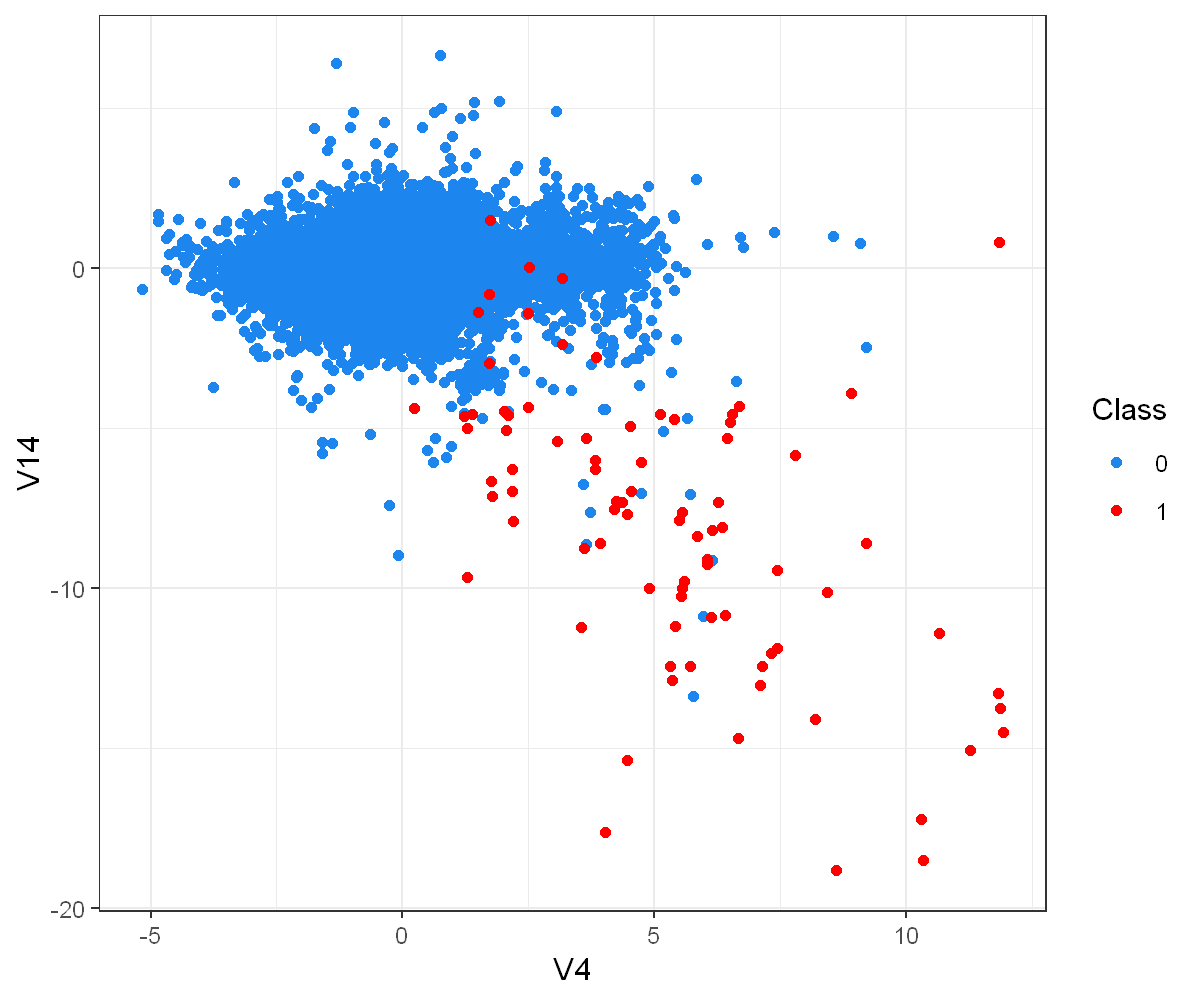

In [107]:
n_smpl = nrow(train_dat)
frac_fraud = 0.5
sampling_res = ovun.sample(
                        Class ~ .
                        , data = train_dat
                        , method = "both"
                        , N = n_smpl
                        , seed = 100
)
both_sampls = sampling_res$data
table(both_sampls$Class)
ggplot(both_sampls, aes(x=V4,y=V14,col=Class)) +
    geom_point() +
    theme_bw() +
    scale_color_manual(values=c('dodgerblue2','red'))

### Lấy mẫu SMOTE

In [108]:
n0 = 45485
n1 = 84
r0 = 0.6
ntimes = ((1-r0)/r0)*(n0/n1)-1


    0     1 
45485 30240 

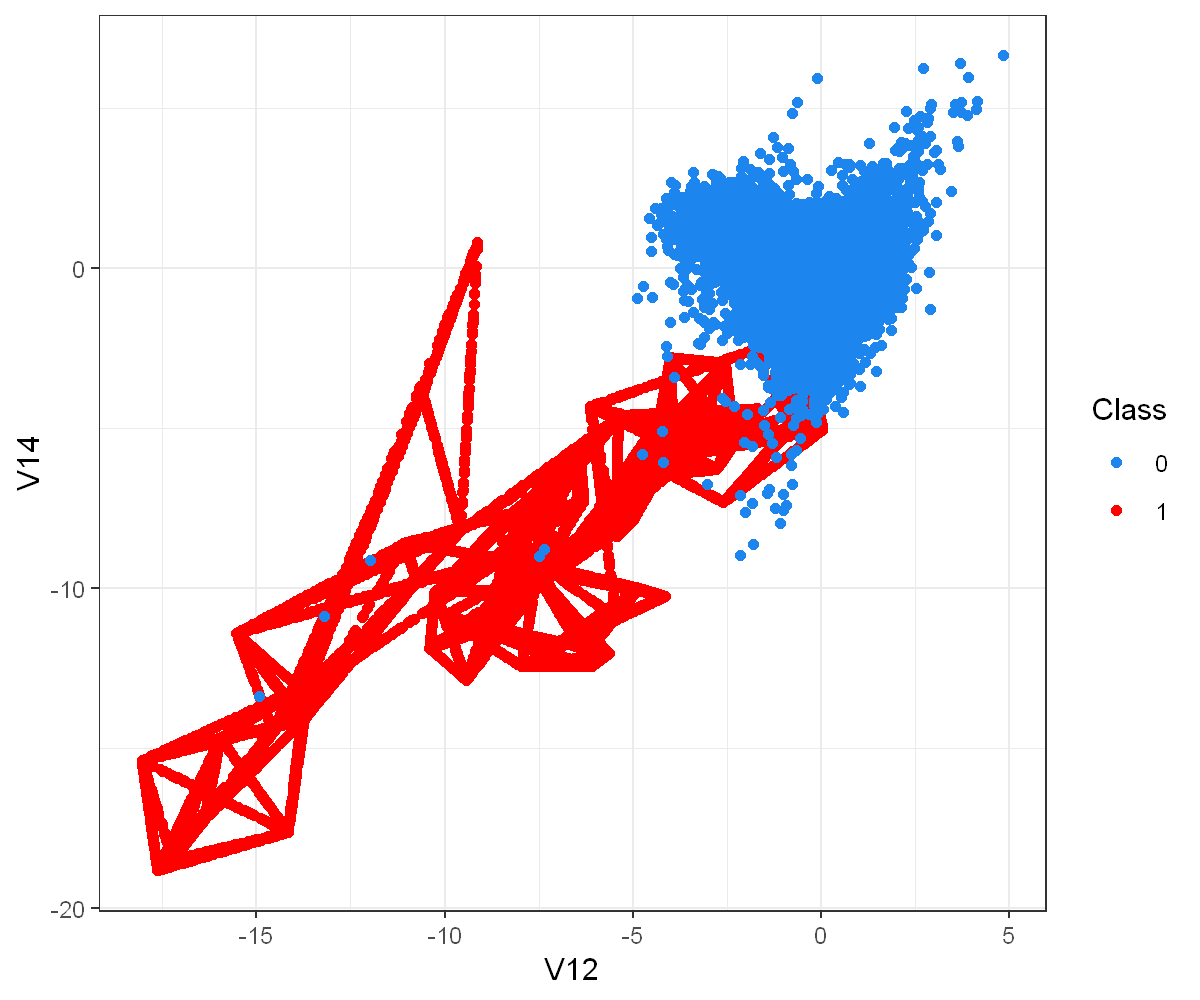

In [109]:
smote_smpl = SMOTE( X = train_dat[,-c(1,30,31)]
                    , target = train_dat$Class
                    , dup_size = ntimes )
smote_sampls = smote_smpl$data
colnames(smote_sampls)[29] <- 'Class'
table(smote_sampls$Class)
ggplot(smote_sampls, aes(x=V12,y=V14,col=Class)) +
    geom_point() +
    theme_bw() +
    scale_color_manual(values=c('dodgerblue2','red'))

## CART MODEL - Classification And Regression Trees

### With SMOTE Sampling

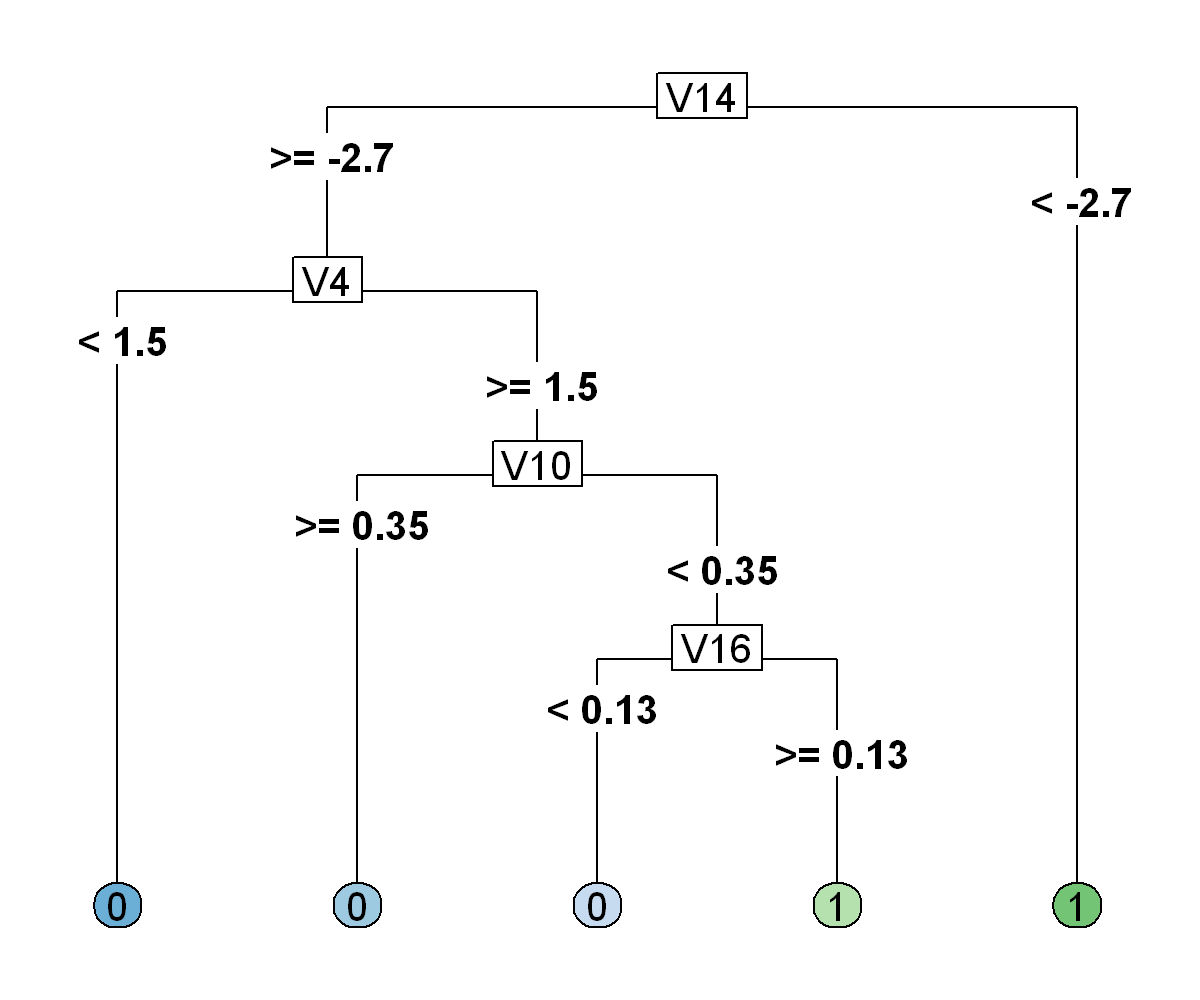

In [110]:
CART_smote = rpart(Class ~ ., smote_sampls)
rpart.plot(CART_smote, extra = 0, type=5, tweak=1.2)

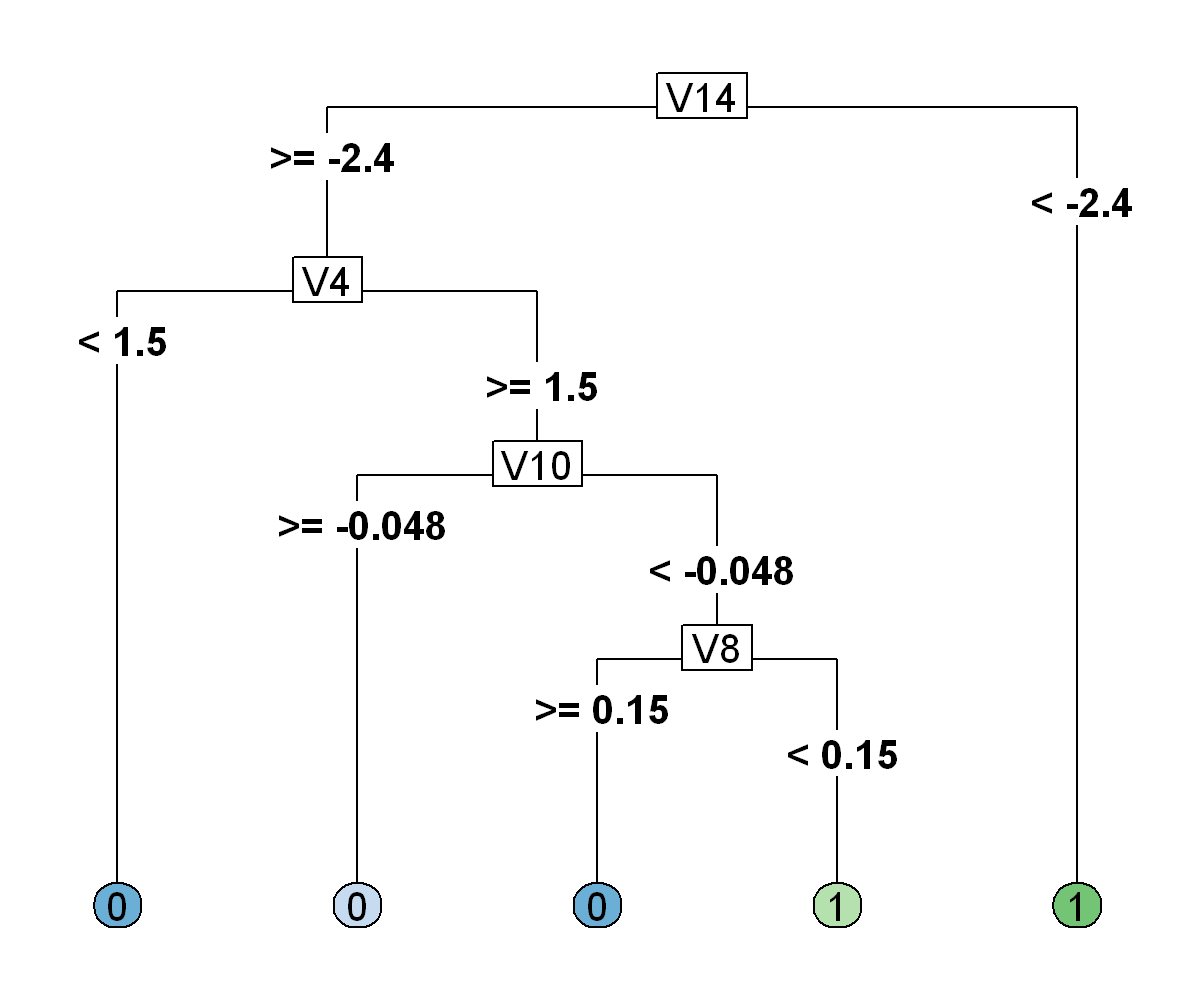

In [111]:
CART_both = rpart(Class ~ ., both_sampls[,-c(1,30)])
rpart.plot(CART_both, extra = 0, type=5, tweak=1.2)

## Validation Classification

In [112]:
# Predict fraud classe with SMOTE sampling
predicted_smote = predict(CART_smote, test_dat, type = 'class')
summary(predicted_smote)

0     1 
11112   280

In [113]:
# Predict fraud classe with BOTH sampling
predicted_both = predict(CART_both, test_dat, type = 'class')
summary(predicted_both)

0     1 
11061   331

### SMOTE Sampling

In [114]:
confusionMatrix(predicted_smote,test_dat$Class)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 11109     3
         1   262    18
                                          
               Accuracy : 0.9767          
                 95% CI : (0.9738, 0.9794)
    No Information Rate : 0.9982          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1166          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.97696         
            Specificity : 0.85714         
         Pos Pred Value : 0.99973         
         Neg Pred Value : 0.06429         
             Prevalence : 0.99816         
         Detection Rate : 0.97516         
   Detection Prevalence : 0.97542         
      Balanced Accuracy : 0.91705         
                                          
       'Positive' Class : 0               
                  

### BOTH Sampling

In [115]:
confusionMatrix(predicted_both,test_dat$Class)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 11056     5
         1   315    16
                                          
               Accuracy : 0.9719          
                 95% CI : (0.9687, 0.9749)
    No Information Rate : 0.9982          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0877          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.97230         
            Specificity : 0.76190         
         Pos Pred Value : 0.99955         
         Neg Pred Value : 0.04834         
             Prevalence : 0.99816         
         Detection Rate : 0.97051         
   Detection Prevalence : 0.97094         
      Balanced Accuracy : 0.86710         
                                          
       'Positive' Class : 0               
                  

## Collusion